# Imports

In [1]:
# Linear Algebra, Data Manipulation
import numpy as np
import pandas as pd
import pickle

# Plots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Preprocessing

## Load the Data

In [2]:
solubility_data = pd.read_csv("./solubility_data.csv")
solubility_data

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Checking for Null Values

In [3]:
solubility_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


In [4]:
solubility_data.isnull().sum()

MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64

In [5]:
solubility_data.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


## EDA

### Correlation HeatMap

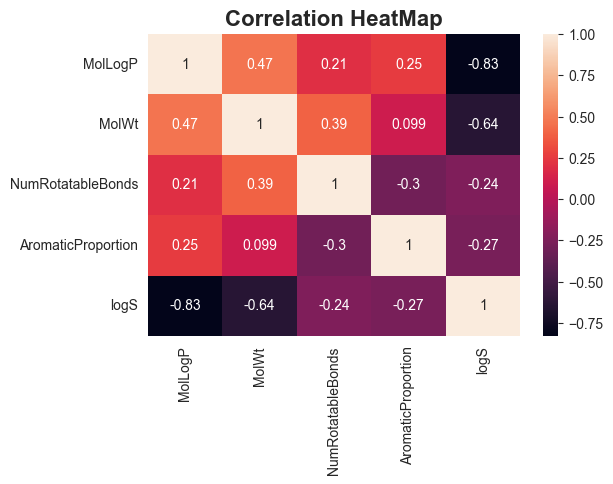

In [6]:
title_font_dict = {"fontsize": 16, "fontweight":"bold"}

plt.figure(figsize=(6, 4), dpi=100)
sns.heatmap(solubility_data.corr(), annot=True)
plt.title("Correlation HeatMap", fontdict=title_font_dict)
plt.show()

### Plotly Plots

In [7]:
subplot_row_col = []
for row in range (1, 3):
    for col in range (1, 3):
        subplot_row_col.append([row, col])
        
cols = ["MolLogP", "MolWt", "AromaticProportion", "logS"]


fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("<b>MolLogP Distribution</b>", "<b>MolWt Distribution</b>",
                                    "<b>AromaticProportion Distribution</b>", "<b>logS Distribution</b>"))

for i in subplot_row_col:
    col_name = cols.pop(0)
    fig.add_trace(
    go.Histogram(x=solubility_data[col_name]),
        row=i[0], col=i[1]
    )
    fig.update_xaxes(title_text=f"{col_name} Values", row=i[0], col=i[1])
    fig.update_yaxes(title_text="Count", row=i[0], col=i[1])
    
fig.update_layout(
    width=1000,
    height=800,
    showlegend=False
)

In [8]:
fig = go.Figure()
fig = px.scatter(solubility_data, x="MolLogP", y="MolWt",color="NumRotatableBonds")
fig.update_traces(
    marker_line_width = 2,
    marker_size = 10,
)
fig.update_layout(
  width=800,
  height=600,
  title="<b>MolLogP vs MolWt</b>",
  xaxis_title="MolLogP",
  yaxis_title="MolWt"
)

In [9]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=("<b>MolLogP vs logS</b>", "<b>MolWt logS</b>"))

fig.add_trace(
    go.Scatter(x=solubility_data.MolLogP, y=solubility_data.logS, mode = "markers",),
    row=1, col=1
)
fig.update_xaxes(title_text="MolLogP", row=1, col=1)
fig.update_yaxes(title_text="logS", row=1, col=1)

fig.add_trace(
    go.Scatter(x=solubility_data.MolWt, y=solubility_data.logS, mode = "markers",),
    row=1, col=2
)
fig.update_xaxes(title_text="MolWt", row=1, col=2)
fig.update_yaxes(title_text="logS", row=1, col=2)

## Preparing Data for Model

In [10]:
X = solubility_data.drop(["logS"], axis=1)
y = solubility_data["logS"]

In [11]:
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [12]:
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

# Regression Model

## Splitting Data into Train and Test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## RandomForestRegressor Model

In [14]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

### Checking Accuracy of Model

In [15]:
regressor_coefficients = regressor.feature_importances_
regressor_r2_score = r2_score(y_test, y_pred)
regressor_mse = mean_squared_error(y_test, y_pred)

print("RandomForestRegressor Coefficients :", regressor_coefficients, "\n")
print("RandomForestRegressor r^2 Score :", round(regressor_r2_score, 4))
print("RandomForestRegressor Mean Squared Error :", round(regressor_mse, 4))

RandomForestRegressor Coefficients : [0.83054046 0.12735831 0.01922636 0.02287487] 

RandomForestRegressor r^2 Score : 0.8793
RandomForestRegressor Mean Squared Error : 0.5384


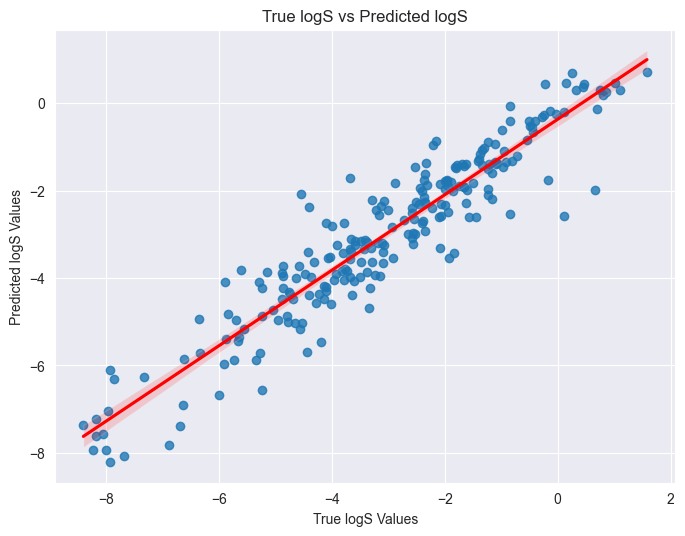

In [16]:
plt.figure(figsize=(8, 6), dpi=100)
sns.regplot(y_test, y_pred, line_kws={"color": "red"})
plt.title("True logS vs Predicted logS")
plt.xlabel("True logS Values")
plt.ylabel("Predicted logS Values")
plt.show()

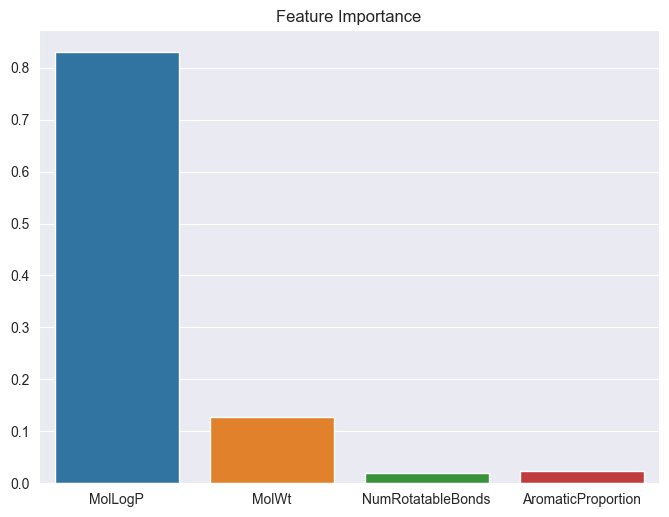

In [17]:
plt.figure(figsize=(8, 6), dpi=100)
sns.barplot(x=regressor.feature_names_in_, y=regressor.feature_importances_)
plt.title("Feature Importance")
plt.show()

### Saving the Model

In [18]:
filename = 'solubility_model_rfr.pkl'
pickle.dump(regressor, open(filename, 'wb'))

## Linear Regression Model

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [20]:
regressor_coefficients = regressor.coef_
regressor_intercept = regressor.intercept_
regressor_r2_score = r2_score(y_test, y_pred)
regressor_mse = mean_squared_error(y_test, y_pred)

print("LinearRegression Coefficients :", regressor_coefficients)
print("LinearRegression Intercept :", regressor_intercept, "\n")
print("LinearRegression r^2 Score :", round(regressor_r2_score, 4))
print("LinearRegression Mean Squared Error :", round(regressor_mse, 4))

LinearRegression Coefficients : [-0.72627463 -0.0068546   0.0186267  -0.36715288]
LinearRegression Intercept : 0.23219916211711888 

LinearRegression r^2 Score : 0.7708
LinearRegression Mean Squared Error : 1.0222


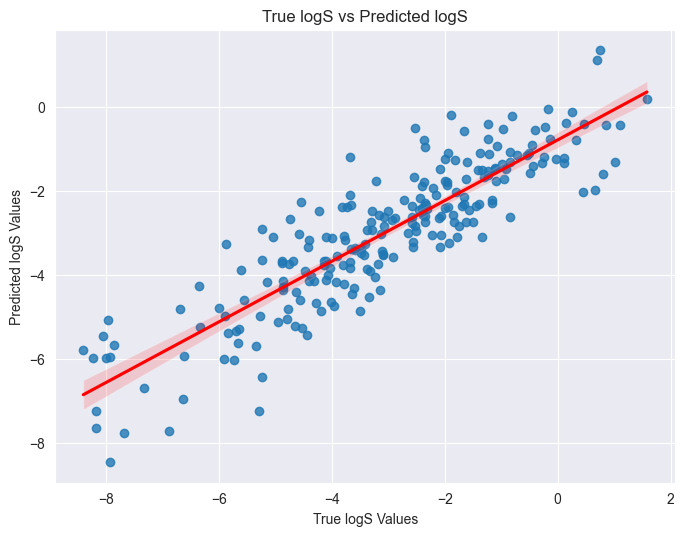

In [21]:
plt.figure(figsize=(8, 6), dpi=100)
sns.regplot(y_test, y_pred, line_kws={"color": "red"})
plt.title("True logS vs Predicted logS")
plt.xlabel("True logS Values")
plt.ylabel("Predicted logS Values")
plt.show()

### Model Equqtion 

In [22]:
print('LogS = %.2f %.2f LogP %.4f MW + %.4f RB %.2f AP' % (regressor.intercept_, regressor.coef_[0], regressor.coef_[1], regressor.coef_[2], regressor.coef_[3] ) )

LogS = 0.23 -0.73 LogP -0.0069 MW + 0.0186 RB -0.37 AP


### Saving the Model

In [23]:
filename = 'solubility_model_lr.pkl'
pickle.dump(regressor, open(filename, 'wb'))